# С использованием метода train_test_split разделите выборку на обучающую и тестовую.

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Подготовка данных и построение базовых моделей для оценки качества

In [2]:
# https://scikit-learn.org/stable/datasets/index.html#iris-dataset
iris = load_iris()

In [3]:
# Наименования признаков
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# Значения признаков
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
type(iris.data)

numpy.ndarray

In [6]:
# Значения целевого признака
np.unique(iris.target)

array([0, 1, 2])

In [7]:
# Наименования значений целевого признака
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
    iris.data, iris.target, test_size=0.5, random_state=1)

In [9]:
# Размер обучающей выборки
iris_X_train.shape, iris_y_train.shape

((75, 4), (75,))

In [10]:
# Размер тестовой выборки
iris_X_test.shape, iris_y_test.shape

((75, 4), (75,))

In [11]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [12]:
# В исходной выборке нет явного дисбаланса классов для целевого признака
print_class_proportions(iris.target)

# Функция train_test_split разделила исходную выборку таким образом, 
# чтобы в обучающей и тестовой частях сохранились пропорции классов.

Метка 	 Количество 	 Процент встречаемости
0 	 50 	 	 33.33%
1 	 50 	 	 33.33%
2 	 50 	 	 33.33%


In [13]:
# Для обучающей выборки
print_class_proportions(iris_y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 26 	 	 34.67%
1 	 26 	 	 34.67%
2 	 23 	 	 30.67%


In [14]:
# Для тестовой выборки
print_class_proportions(iris_y_test)

Метка 	 Количество 	 Процент встречаемости
0 	 24 	 	 32.0%
1 	 24 	 	 32.0%
2 	 27 	 	 36.0%


Построим базовые модели на основе метода ближайших соседей

In [15]:
# 2 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=2)
cl1_1.fit(iris_X_train, iris_y_train)
target1_1 = cl1_1.predict(iris_X_test)
len(target1_1), target1_1

(75,
 array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
        1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 2,
        0, 1, 2, 1, 1, 2, 1, 0, 1]))

In [16]:
# 10 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=10)
cl1_2.fit(iris_X_train, iris_y_train)
target1_2 = cl1_2.predict(iris_X_test)
len(target1_2), target1_2

(75,
 array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
        1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2,
        0, 2, 2, 1, 1, 2, 2, 0, 1]))

## Метрики качества классификации

### Accuracy

Метрика вычисляет процент (долю в диапазоне от 0 до 1) правильно определенных классов.

Эту метрику обычно переводят как "точность", но перевод не является удачным, потому что совпадает с переводом для другой метрики - "precision".

Чтобы не сталкиваться с неточностями перевода, названия метрик можно не переводить.

In [17]:
# iris_y_test - эталонное значение классов из исходной (тестовой) выборки
# target* - предсказанное значение классов

# 2 ближайших соседа
accuracy_score(iris_y_test, target1_1)

0.92

In [18]:
# 10 ближайших соседей
accuracy_score(iris_y_test, target1_2)

0.9733333333333334

Точность в случае 10 ближайших соседей составляет более 97%, а точность в случае 2 ближайших соседей составляет 92%.

Метрика "Accuracy" показывает точность по всем классам, но точность может быть различной для различных классов.

Это очень серьезная проблема, которая часто возникает на несбалансированных выборках.

In [19]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [20]:
# 2 ближайших соседа
print_accuracy_score_for_classes(iris_y_test, target1_1)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 0.7777777777777778


Accuracy для классов 0 и 1 составляет 100%, но для класса 2 только 78%.

In [21]:
# 10 ближайших соседей
print_accuracy_score_for_classes(iris_y_test, target1_2)

Метка 	 Accuracy
0 	 1.0
1 	 0.9583333333333334
2 	 0.9629629629629629


Accuracy для класса 0 составляет 100%, но для классов 2 и 3 около 95-96%.

In [22]:
# Конвертация целевого признака в бинарный
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [23]:
# Если целевой признак ==2, 
# то будем считать этот случай 1 в бинарном признаке
bin_iris_y_train = convert_target_to_binary(iris_y_train, 2)
list(zip(iris_y_train, bin_iris_y_train))[:10]

[(1, 0),
 (2, 1),
 (1, 0),
 (2, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (2, 1),
 (0, 0)]

In [24]:
bin_iris_y_test = convert_target_to_binary(iris_y_test, 2)
list(zip(iris_y_test, bin_iris_y_test))[:10]

[(0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 1),
 (1, 0),
 (2, 1),
 (0, 0),
 (0, 0),
 (2, 1)]

In [25]:
# Конвертация предсказанных признаков
bin_target1_1 = convert_target_to_binary(target1_1, 2)
bin_target1_2 = convert_target_to_binary(target1_2, 2)

In [26]:
balanced_accuracy_score(bin_iris_y_test, bin_target1_1)

0.8888888888888888

In [27]:
balanced_accuracy_score(bin_iris_y_test, bin_target1_2)

0.9710648148148148

#### Вывод.
Метрика Accuracy интуитивно понятна и часто используется на практике. Но если количество классов относительно невелико, то лучше всего вычислять Accuracy отдельно для каждого класса.

## Подбор гиперпараметров модели и кросс-валидация

In [28]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_boston
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [29]:
iris = load_iris()

In [30]:
# Разделение выборки на обучающую и тестовую
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
    iris.data, iris.target, test_size=0.5, random_state=1)

In [31]:
# В моделях k-ближайших соседей большое значение k 
# ведёт к большому смещению и низкой дисперсии (недообучению)
# 70 ближайших соседей
cl1_1 = KNeighborsClassifier(n_neighbors=70)
cl1_1.fit(iris_X_train, iris_y_train)
target1_0 = cl1_1.predict(iris_X_train)
target1_1 = cl1_1.predict(iris_X_test)
accuracy_score(iris_y_train, target1_0), accuracy_score(iris_y_test, target1_1)

(0.6533333333333333, 0.6266666666666667)

In [32]:
# 5 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=5)
cl1_2.fit(iris_X_train, iris_y_train)
target1_0 = cl1_2.predict(iris_X_train)
target1_1 = cl1_2.predict(iris_X_test)
accuracy_score(iris_y_train, target1_0), accuracy_score(iris_y_test, target1_1)

(0.9466666666666667, 0.9466666666666667)

In [33]:
# 1 ближайший сосед - "условное" переобучение
cl1_2 = KNeighborsClassifier(n_neighbors=1)
cl1_2.fit(iris_X_train, iris_y_train)
target1_0 = cl1_2.predict(iris_X_train)
target1_1 = cl1_2.predict(iris_X_test)
accuracy_score(iris_y_train, target1_0), accuracy_score(iris_y_test, target1_1)

(1.0, 0.9466666666666667)

### K-fold

In [34]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

2

In [35]:
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [36]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


##$ LIfe

In [37]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)

2

In [38]:
print(loo)

LeaveOneOut()


In [39]:

for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)

TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]


### GridSearchCV

In [40]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [41]:

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [42]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [43]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(iris_X_train, iris_y_train)

CPU times: user 96.7 ms, sys: 2.68 ms, total: 99.4 ms
Wall time: 98.2 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [44]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00058303, 0.00089903, 0.00053716, 0.00043654, 0.00036407,
        0.00031571, 0.00030751, 0.00028744, 0.0003242 , 0.00031161]),
 'std_fit_time': array([5.28480152e-05, 7.88431394e-04, 8.35767819e-05, 4.03233418e-05,
        1.39844234e-05, 3.83631423e-05, 2.72387983e-05, 3.25019706e-06,
        8.28807453e-05, 4.86941567e-05]),
 'mean_score_time': array([0.00152302, 0.00140553, 0.00189152, 0.00112076, 0.00105753,
        0.00095286, 0.00089235, 0.00093393, 0.00087929, 0.00095248]),
 'std_score_time': array([3.19235729e-04, 1.74880468e-04, 8.42419742e-04, 7.54378990e-05,
        1.11400284e-04, 8.47049373e-05, 2.18557936e-05, 1.39058535e-04,
        3.61003836e-05, 1.49385707e-04]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_

In [45]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier()

In [46]:
# Лучшее значение метрики
clf_gs.best_score_

0.9733333333333334

In [47]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 5}

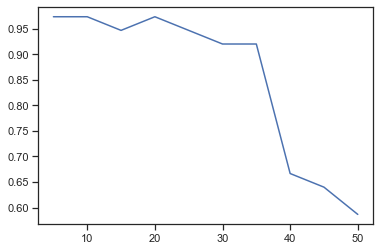

In [48]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

### Randomized Search

In [49]:
%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_rs.fit(iris_X_train, iris_y_train)

CPU times: user 90.7 ms, sys: 3.74 ms, total: 94.4 ms
Wall time: 92 ms


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
                   scoring='accuracy')

In [50]:
# В данном случае оба способа нашли одинаковое решение
clf_rs.best_score_, clf_rs.best_params_

(0.9733333333333334, {'n_neighbors': 5})

In [51]:
clf_gs.best_score_, clf_gs.best_params_

(0.9733333333333334, {'n_neighbors': 5})

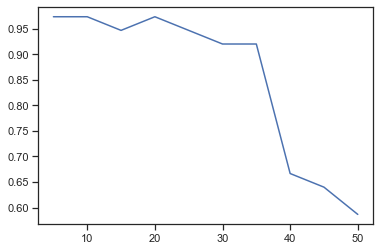

In [52]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_rs.cv_results_['mean_test_score'])